In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import seaborn as sns
import pickle
import copy

import src.metrics as metrics
import src.kernels as kernels
import src.bootstrap as boot
import src.exp_utils as exp_utils
import experiments.nf as nf_utils

Seed set to 42


Using device cpu


Seed set to 42


# Exploration

In [ ]:
samples_res = pickle.load(open("../data/nf/samples_res.pkl", "rb"))
scores_res = pickle.load(open("../data/nf/scores_res.pkl", "rb"))

In [219]:
scores_res[5.].shape

(3, 784)

In [226]:
ss = samples_res[5.][0]
ss = torch.tensor(ss.reshape([1, 1, 28, 28]), dtype=torch.float64).requires_grad_(True)
log_px = flow_model._get_likelihood(ss, return_ll=True)
log_px.backward()
grad_log_px = ss.grad.detach().numpy().reshape([1, 28**2])

gg = scores_res[5.][0]

print(np.allclose(grad_log_px, gg))

False


In [221]:
gg

array([-1.63435912e+00, -7.27953732e-01, -5.66502392e-01, -1.28071964e+00,
       -6.15881681e-01, -2.27037830e+01, -2.59067020e+01,  1.47285873e+02,
       -2.50929928e+01,  1.83902496e+02, -2.40778542e+01, -3.50008163e+01,
       -2.70649090e+01, -3.56064644e+01, -2.81138229e+01, -3.87921066e+01,
       -1.25992143e+00, -3.36757889e+01, -2.58436108e+01, -4.13030167e+01,
       -2.59001369e+01, -2.94358578e+01,  4.61087837e+01, -3.69864883e+01,
       -2.34267902e+01, -4.05659332e+01, -2.43858051e+01, -2.46120644e+01,
        1.56939313e-01, -2.00292636e-02,  3.73690426e-01, -8.47651809e-02,
        1.29358619e-01, -1.08112926e+01, -5.52713737e+01, -7.34531641e+00,
       -3.52323418e+01, -2.28310146e+01, -2.50636978e+01, -2.65410252e+01,
       -3.79056931e+01,  2.43168964e+01, -2.50997314e+01, -7.98819733e+00,
       -1.91448536e+01, -2.02958794e+01, -1.76184063e+01,  3.49340844e+00,
       -2.73763943e+01, -3.14777889e+01,  3.13722630e+01, -1.44404697e+01,
        2.87813416e+02, -

In [212]:
gg

array([-1.63435912e+00, -7.27953732e-01, -5.66502392e-01, -1.28071964e+00,
       -6.15881681e-01, -2.27037830e+01, -2.59067020e+01,  1.47285873e+02,
       -2.50929928e+01,  1.83902496e+02, -2.40778542e+01, -3.50008163e+01,
       -2.70649090e+01, -3.56064644e+01, -2.81138229e+01, -3.87921066e+01,
       -1.25992143e+00, -3.36757889e+01, -2.58436108e+01, -4.13030167e+01,
       -2.59001369e+01, -2.94358578e+01,  4.61087837e+01, -3.69864883e+01,
       -2.34267902e+01, -4.05659332e+01, -2.43858051e+01, -2.46120644e+01,
        1.56939313e-01, -2.00292636e-02,  3.73690426e-01, -8.47651809e-02,
        1.29358619e-01, -1.08112926e+01, -5.52713737e+01, -7.34531641e+00,
       -3.52323418e+01, -2.28310146e+01, -2.50636978e+01, -2.65410252e+01,
       -3.79056931e+01,  2.43168964e+01, -2.50997314e+01, -7.98819733e+00,
       -1.91448536e+01, -2.02958794e+01, -1.76184063e+01,  3.49340844e+00,
       -2.73763943e+01, -3.14777889e+01,  3.13722630e+01, -1.44404697e+01,
        2.87813416e+02, -

In [228]:
grad_log_px

array([[-1.65945756e+00, -7.60457218e-01, -3.14714849e-01,
        -2.68949509e+00, -2.12996006e+00,  8.24991989e+01,
        -2.27444038e+01,  1.20152435e+02, -2.35301018e+01,
        -3.56453819e+01, -2.84642353e+01, -2.84418716e+01,
        -2.05259762e+01, -2.35595703e+01, -2.85520382e+01,
        -2.73892574e+01, -2.23792572e+01,  4.06904488e+01,
        -2.38104038e+01, -3.80589561e+01, -2.51096916e+01,
         6.25553284e+01, -1.42705173e+01,  1.34398819e+02,
        -1.51885080e+01, -3.33577766e+01, -3.01672897e+01,
        -1.47614059e+01,  2.47536838e-01, -1.17415907e-02,
         3.63592297e-01, -7.48175755e-02,  1.30525947e-01,
        -1.31798763e+01, -4.43387566e+01, -3.45325813e+01,
        -3.72664871e+01, -2.03994656e+01, -4.32588310e+01,
        -2.10528889e+01, -3.98037186e+01,  5.20031691e+00,
         9.26136627e+01, -3.13165569e+01, -3.51080170e+01,
        -3.24680481e+01, -2.87148933e+01, -2.90717106e+01,
        -3.44408150e+01, -1.49494982e+01,  1.19609327e+0

In [211]:
grad_log_px

array([[-1.31774187e+00, -6.10866368e-01, -1.78693369e-01,
        -5.81925154e-01, -3.56113225e-01, -3.94478493e+01,
        -2.01207294e+01,  4.40199188e+02, -2.41298847e+01,
         1.70624985e+02,  5.43263550e+01, -1.73049374e+01,
        -1.97921429e+01, -2.86553478e+01, -2.20909252e+01,
         5.81550884e+00, -2.98598385e+01, -3.18936100e+01,
        -2.06554813e+01, -4.47615814e+01, -2.25664730e+01,
        -1.00404558e+01, -1.99210529e+01, -3.86245489e+00,
        -2.15992565e+01, -3.72775192e+01, -2.75406551e+01,
        -2.02716522e+01,  1.94136456e-01, -1.82477757e-04,
         2.89462507e-01, -7.56782293e-02,  1.15298390e-01,
        -3.02061772e+00, -4.29426651e+01, -2.50369301e+01,
        -4.35875664e+01, -1.66724377e+01,  4.83073006e+01,
        -2.96438179e+01, -3.05018806e+01,  9.15559006e+00,
         2.45175186e+02, -3.04296951e+01, -2.34440689e+01,
        -2.56326904e+01, -3.65511398e+01,  1.25517563e+02,
         1.85717831e+01, -2.91901817e+01, -1.28387432e+0

# Load

In [80]:
samples_res = pickle.load(open("../data/nf/samples_res_n1000.pkl", "rb"))
scores_res = pickle.load(open("../data/nf/scores_res_n1000.pkl", "rb"))

# samples_res = pickle.load(open("../data/nf/samples_res_n3_seed2.pkl", "rb"))
# scores_res = pickle.load(open("../data/nf/scores_res_n3_seed2.pkl", "rb"))

In [81]:
flow_model, _ = nf_utils.train_flow(nf_utils.create_multiscale_flow(), model_name="MNISTFlow_multiscale")

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Found pretrained model, loading...


std: 0.0


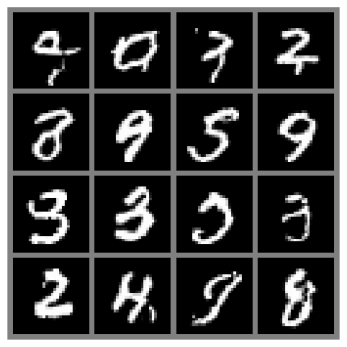

std: 1.0


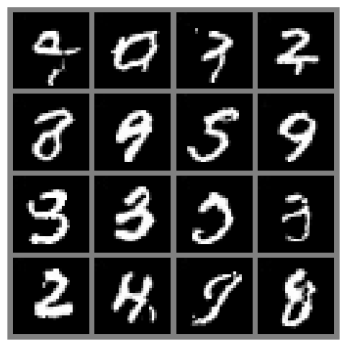

std: 5.0


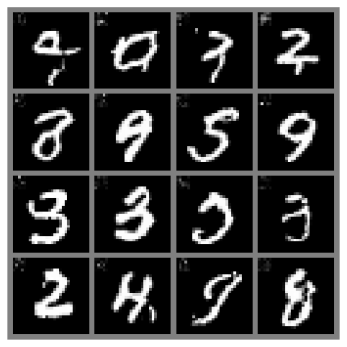

std: 10.0


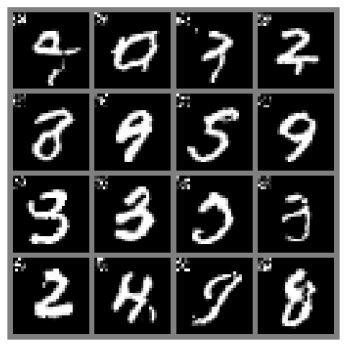

std: 20.0


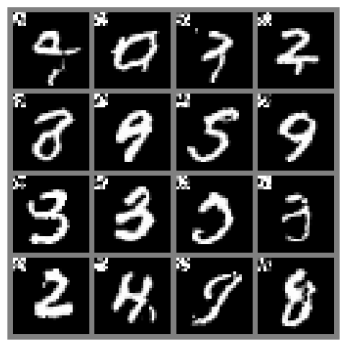

std: 50.0


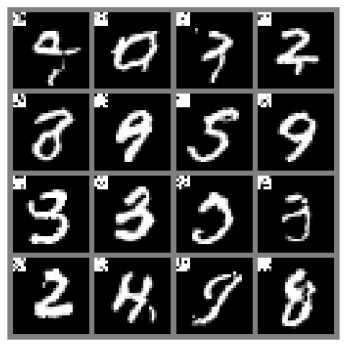

std: 100.0


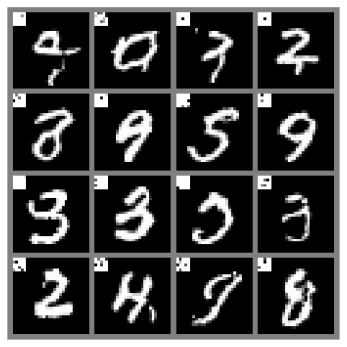

In [82]:
for std in samples_res.keys():
    print("std:", std)
    nf_utils.show_imgs(torch.tensor(samples_res[std][:16].reshape([-1, 1, 28, 28]), dtype=torch.int32))

In [92]:
xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

yy = scores_res[0.][0]
yy = torch.tensor(yy, dtype=torch.float64).requires_grad_(True)

pl.seed_everything(2024)
# this might take ~20mins
hes = torch.autograd.functional.hessian(lambda x: flow_model._get_likelihood(x.reshape([1, 1, 28, 28]), return_ll=True), xx)

Seed set to 2024


In [94]:
hes.shape

torch.Size([784, 784])

In [97]:
pl.seed_everything(2024)
hes_vec = torch.autograd.functional.hvp(lambda x: flow_model._get_likelihood(x.reshape([1, 1, 28, 28]), return_ll=True), xx, yy)

Seed set to 2024


In [98]:
hes_vec[0], hes_vec[1].shape

(tensor([-643.8462]), torch.Size([784]))

In [ ]:
torch.allclose(torch.linalg.matmul(hes, yy), hes_vec[1], rtol=1e-4)

In [108]:
b = 1.
2 * b * torch.sum(hes_vec[1]**2)**0.5 * (1 + torch.sum(yy**2))**(- b - 1)

tensor(8.2029e-06, dtype=torch.float64, grad_fn=<MulBackward0>)

In [160]:
pl.seed_everything(2024)

xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

def compute_grad(xx):
    log_px = flow_model._get_likelihood(xx.reshape([1, 1, 28, 28]), return_ll=True)
    # log_px.backward()
    # grad_log_px = xx.grad.reshape((28**2,))
    grad_log_px = torch.autograd.grad([log_px], [xx], retain_graph=True)
    return grad_log_px, log_px

Seed set to 2024


In [161]:
pl.seed_everything(2024)
grad_xx, log_pxx = compute_grad(xx)
# pl.seed_everything(2024)
# hess_xx = torch.autograd.functional.hessian(lambda x: compute_grad(x)[0][0], xx)

Seed set to 2024


In [165]:
xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

pl.seed_everything(2024)
log_px = flow_model._get_likelihood(xx.reshape([1, 1, 28, 28]), return_ll=True)
print(log_px)

# grad_log_px = torch.autograd.grad([log_px], [xx])

pl.seed_everything(10)
grad_log_px2 = torch.autograd.grad([log_px], [xx])

Seed set to 2024


tensor([-643.8462], grad_fn=<AddBackward0>)


Seed set to 10


In [164]:
grad_log_px

(tensor([-2.6694e+01, -4.2400e+01, -1.2384e+01,  2.2787e+02,  1.2623e+00,
         -3.2318e+01, -1.1071e+01, -3.9934e+01, -2.6119e+01, -3.4600e+01,
         -2.6144e+00, -3.4041e+01,  1.6537e+00, -3.7967e+01, -1.7085e+01,
         -3.3689e+01, -2.7713e+01, -4.2988e+01, -2.4359e+01, -3.2085e+01,
         -1.8820e+01, -3.3554e+01, -2.6126e+01, -3.1347e+01, -1.3406e+01,
         -3.6581e+01, -1.3476e+01, -2.3365e+01, -1.8183e+01,  1.3000e+02,
         -2.7858e+01, -6.2087e+00, -3.5100e+01, -3.1678e+01, -4.2963e+01,
         -2.0396e+01, -2.8959e+01,  2.8744e+01,  5.0248e+01, -2.5236e+01,
          2.2836e+02, -1.1789e+01,  2.4982e+01, -2.9353e+01, -2.2001e+01,
         -6.7391e+00, -1.8817e+01, -2.1735e+01, -3.4401e+01, -1.0807e+01,
         -4.2187e+01,  5.4839e+00, -1.6872e+01, -2.9715e+01, -7.8770e+00,
         -1.5892e+01, -1.5749e+01, -4.1385e+01, -3.2007e+01, -3.5117e+01,
          1.2203e+02, -2.2976e+01, -1.8674e+01,  7.3838e+01,  3.5064e+00,
         -4.1672e+01,  3.7730e+01, -3.

In [168]:
torch.allclose(grad_log_px[0], grad_log_px2[0])

True

In [256]:
# check if grad computation is vectorisable
pl.seed_everything(2024)

xx = samples_res[0.][0]
xx_ls = [torch.tensor(xx, dtype=torch.float64).requires_grad_(True) for _ in range(2)]

log_px_ls = []
for xx in xx_ls:
    pl.seed_everything(2024)
    log_px = flow_model._get_likelihood(xx.reshape([-1, 1, 28, 28]), return_ll=True)

    # xx = xx.detach().requires_grad_(True)
    pl.seed_everything(2024)
    log_px2, hes_vec = torch.autograd.functional.hvp(lambda x: flow_model._get_likelihood(x.reshape([-1, 1, 28, 28]), return_ll=True), xx, yy)

    assert torch.allclose(log_px, log_px2)
    log_px_ls.append(log_px)

grad_log_px = torch.autograd.grad(log_px_ls, xx_ls, retain_graph=True)

Seed set to 2024
Seed set to 2024
Seed set to 2024
Seed set to 2024
Seed set to 2024


In [257]:
torch.allclose(grad_log_px[0], grad_log_px[1])

True

In [258]:
# check grad is the same so long as log_px is the same
grad_log_px2 = torch.autograd.grad(log_px_ls, xx_ls)

In [259]:
torch.allclose(grad_log_px[0], grad_log_px2[0])

True

In [260]:
torch.allclose(grad_log_px[0], grad_log_px[1])

True

In [261]:
grad_log_px[0]

tensor([-2.6694e+01, -4.2400e+01, -1.2384e+01,  2.2787e+02,  1.2623e+00,
        -3.2318e+01, -1.1071e+01, -3.9934e+01, -2.6119e+01, -3.4600e+01,
        -2.6144e+00, -3.4041e+01,  1.6537e+00, -3.7967e+01, -1.7085e+01,
        -3.3689e+01, -2.7713e+01, -4.2988e+01, -2.4359e+01, -3.2085e+01,
        -1.8820e+01, -3.3554e+01, -2.6126e+01, -3.1347e+01, -1.3406e+01,
        -3.6581e+01, -1.3476e+01, -2.3365e+01, -1.8183e+01,  1.3000e+02,
        -2.7858e+01, -6.2087e+00, -3.5100e+01, -3.1678e+01, -4.2963e+01,
        -2.0396e+01, -2.8959e+01,  2.8744e+01,  5.0248e+01, -2.5236e+01,
         2.2836e+02, -1.1789e+01,  2.4982e+01, -2.9353e+01, -2.2001e+01,
        -6.7391e+00, -1.8817e+01, -2.1735e+01, -3.4401e+01, -1.0807e+01,
        -4.2187e+01,  5.4839e+00, -1.6872e+01, -2.9715e+01, -7.8770e+00,
        -1.5892e+01, -1.5749e+01, -4.1385e+01, -3.2007e+01, -3.5117e+01,
         1.2203e+02, -2.2976e+01, -1.8674e+01,  7.3838e+01,  3.5064e+00,
        -4.1672e+01,  3.7730e+01, -3.6533e+01, -3.1

In [198]:
import functorch

def hvp(f, primals, tangents):
  return functorch.jvp(functorch.grad(f), primals, tangents)

In [244]:
xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

yy = scores_res[0.][0]
yy = torch.tensor(yy, dtype=torch.float64).requires_grad_(True)

pl.seed_everything(2024)
hes_vec2 = hvp(lambda x: flow_model._get_likelihood(x.reshape([-1, 1, 28, 28]), return_ll=True).squeeze(), (xx,), (yy,))
# functorch.grad(lambda x: flow_model._get_likelihood(x.reshape([1, 1, 28, 28]), return_ll=True).squeeze())(xx)

Seed set to 2024


In [234]:
hes_vec2

(tensor([-2.6694e+01, -4.2400e+01, -1.2384e+01,  2.2787e+02,  1.2623e+00,
         -3.2318e+01, -1.1071e+01, -3.9934e+01, -2.6119e+01, -3.4600e+01,
         -2.6144e+00, -3.4041e+01,  1.6537e+00, -3.7967e+01, -1.7085e+01,
         -3.3689e+01, -2.7713e+01, -4.2988e+01, -2.4359e+01, -3.2085e+01,
         -1.8820e+01, -3.3554e+01, -2.6126e+01, -3.1347e+01, -1.3406e+01,
         -3.6581e+01, -1.3476e+01, -2.3365e+01, -1.8183e+01,  1.3000e+02,
         -2.7858e+01, -6.2087e+00, -3.5100e+01, -3.1678e+01, -4.2963e+01,
         -2.0396e+01, -2.8959e+01,  2.8744e+01,  5.0248e+01, -2.5236e+01,
          2.2836e+02, -1.1789e+01,  2.4982e+01, -2.9353e+01, -2.2001e+01,
         -6.7391e+00, -1.8817e+01, -2.1735e+01, -3.4401e+01, -1.0807e+01,
         -4.2187e+01,  5.4839e+00, -1.6872e+01, -2.9715e+01, -7.8770e+00,
         -1.5892e+01, -1.5749e+01, -4.1385e+01, -3.2007e+01, -3.5117e+01,
          1.2203e+02, -2.2976e+01, -1.8674e+01,  7.3838e+01,  3.5064e+00,
         -4.1672e+01,  3.7730e+01, -3.

In [237]:
xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

yy = scores_res[0.][0]
yy = torch.tensor(yy, dtype=torch.float64).requires_grad_(True)

pl.seed_everything(2024)
hes_vec = torch.autograd.functional.hvp(lambda x: flow_model._get_likelihood(x.reshape([-1, 1, 28, 28]), return_ll=True), xx, yy)
hes_vec

Seed set to 2024


(tensor([-643.8462]),
 tensor([ 1.9905e+03,  2.6021e+04,  7.8457e+02,  2.3221e+06,  1.6199e+05,
          4.8884e+04,  7.1676e+04,  1.5249e+04,  1.0109e+04,  1.5072e+04,
          1.4743e+05,  1.8777e+04,  1.7350e+05,  4.1375e+04, -3.0859e+03,
          1.0375e+04,  1.2305e+04, -3.6733e+04, -1.5203e+03, -7.3693e+03,
         -5.5322e+03,  1.7059e+04, -7.1602e+03,  1.6147e+04,  6.3738e+04,
         -4.3874e+04, -1.0372e+04, -4.7230e+03,  9.2258e+03,  6.6493e+05,
         -1.2874e+05,  1.2028e+05, -6.7166e+04, -5.0767e+03,  6.7516e+03,
          3.6578e+04,  9.2233e+04,  3.1051e+04, -3.3030e+06, -4.9724e+04,
          2.4496e+06,  3.8300e+04, -1.3792e+06, -1.2768e+04,  5.3373e+03,
         -1.4675e+05,  1.6300e+05, -9.3094e+01,  1.8735e+04,  7.1046e+04,
         -1.0113e+04, -4.5415e+04,  1.6988e+05, -2.1135e+03, -2.1227e+05,
          3.1290e+04,  1.1517e+02,  1.2082e+03, -1.4701e+02, -5.0123e+03,
         -3.1572e+06,  1.2973e+05,  2.4191e+04,  7.4599e+05,  1.3335e+05,
          5.6883

In [241]:
torch.allclose(hes_vec[1], hes_vec2[1], rtol=1e-4)

True

#### batch hvp

In [265]:
xx = samples_res[0.][0]
xx = torch.tensor(xx, dtype=torch.float64).requires_grad_(True)

yy = scores_res[0.][0]
yy = torch.tensor(yy, dtype=torch.float64)

pl.seed_everything(2024)
# hes_vec2 = hvp(lambda x: flow_model._get_likelihood(x.reshape([-1, 1, 28, 28]), return_ll=True).squeeze(), (xx, xx), (yy, yy))


Seed set to 2024


2024

# Test

#### preliminary

In [11]:
n = 500
seed_ls = [0, 9, 18, 27, 36]
std_ls = [0., 1., 5., 10., 20., 50., 100.]

samples_res = {s: [] for s in std_ls}
scores_res = {s: [] for s in std_ls}
hvp_res = {s: [] for s in std_ls}
# hvp_res = {s: np.empty([len(seed_ls)*2, n, 28**2) for s in std_ls}
for s in seed_ls:
    samples_res_sub = pickle.load(open(f"../data/nf/samples_res_n{n}_seed{s}.pkl", "rb"))
    scores_res_sub = pickle.load(open(f"../data/nf/scores_res_n{n}_seed{s}.pkl", "rb"))
    hvp_res_sub = pickle.load(open(f"../data/nf/hvp_res_n{n}_seed{s}.pkl", "rb"))

    for std in std_ls:
        samples_res[std].append(samples_res_sub[std])
        scores_res[std].append(scores_res_sub[std])
        hvp_res[std].append(hvp_res_sub[std])

for std in std_ls:
    samples_res[std] = np.concatenate(samples_res[std], 0)
    scores_res[std] = np.concatenate(scores_res[std], 0)
    hvp_res[std] = np.concatenate(hvp_res[std], 0)
    

In [83]:
n = 200
std = 20.
X = samples_res[std][:n]
scores_X = scores_res[std][:n]
kernel0 = kernels.RBF(sigma_sq=None, med_heuristic=True, X=X, Y=X)
kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)

ksd = metrics.KSD(kernel)
wild_boot = boot.WildBootstrap(ksd)
pval, stat, boot_stats = wild_boot.pval(X, X, return_stat=True, return_boot=True, scores=scores_X)

In [84]:
pval

Array(0.000999, dtype=float32, weak_type=True)

In [36]:
# std = 0
n_exp = 500

res = {"rbf": []}
for std in std_ls:
    res_sub = exp_utils.run_tests(
        samples=samples_res[std][:, :n_exp], 
        scores=scores_res[std][:, :n_exp],
        hvps=hvp_res[std][:, :n_exp],
        theta=0.1,
        bw="med",
        verbose=True,
    )
    res["rbf"].append(res_sub["rbf"])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.89s/it]


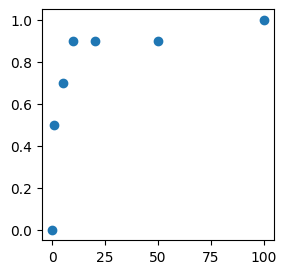

In [35]:
# n = 200
res_rej = [np.mean(rr["rej"]) for rr in res["rbf"]]

_, ax = plt.subplots(figsize=(3, 3))
ax.scatter(std_ls, res_rej)


In [40]:
res["rbf"][0]["rej"]

[0, 1, 0, 1, 0, 1, 1, 0, 1, 0]

(-0.05, 1.05)

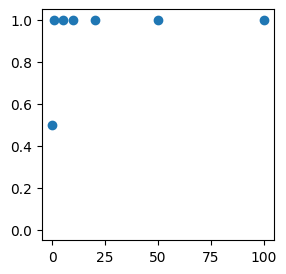

In [39]:
# n = 500
res_rej = [np.mean(rr["rej"]) for rr in res["rbf"]]

_, ax = plt.subplots(figsize=(3, 3))
ax.scatter(std_ls, res_rej)
ax.set_ylim(-0.05, 1.05)

In [74]:
samples = np.load("../data/nf_ksdagg/testing/X_mnist_level.npy")
scores = np.load("../data/nf_ksdagg/testing/score_X_mnist_level.npy")

In [44]:
samples.shape

(200, 500, 784)

In [56]:
n_exp = 500
res_ksdagg = exp_utils.run_tests(
    samples=samples[:10, :n_exp], 
    scores=scores[:10, :n_exp],
    hvps=None,
    theta=0.1,
    # bw="med",
    bw=1,
    verbose=True,
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:37<00:00,  3.79s/it]


In [70]:
np.mean(res_ksdagg["rbf"]["stat"][4] > np.array(res_ksdagg["rbf"]["stat"]))

Array(0.6, dtype=float32)

In [50]:
res_ksdagg["rbf"]["rej"]

[1, 1, 1, 1, 1, 0, 1, 0, 1, 1]

In [55]:
res_ksdagg["rbf"]["pval"]

[Array(0.002997, dtype=float32, weak_type=True),
 Array(0.000999, dtype=float32, weak_type=True),
 Array(0.01498501, dtype=float32, weak_type=True),
 Array(0.06293707, dtype=float32, weak_type=True),
 Array(0.00599401, dtype=float32, weak_type=True),
 Array(0.28671327, dtype=float32, weak_type=True),
 Array(0.000999, dtype=float32, weak_type=True),
 Array(0.0999001, dtype=float32, weak_type=True),
 Array(0.000999, dtype=float32, weak_type=True),
 Array(0.04095904, dtype=float32, weak_type=True)]

#### Check sup grad weight norm

In [81]:
for std in std_ls:
    samples = samples_res[std]
    scores = scores_res[std]
    hvps = hvp_res[std]
    
    grad_weight_norm = np.sum(hvps**2, -1)**0.5 * (1 + np.sum(scores**2, -1))**(-1.5)
    print(std, np.max(grad_weight_norm))

0.0 0.28400734548531276
1.0 0.2846952134094486
5.0 0.2978263795705776
10.0 0.3366347755001631
20.0 0.3230115744219347
50.0 0.684280873627481
100.0 0.349410444593777


In [89]:
np.random.seed(2024)

n_exp = 200
hvp_denom_sup = 1.
theta = 0.1

res = {}
for std in std_ls:
    samples = samples_res[std][:, :n_exp]
    scores = scores_res[std][:, :n_exp]
    hvps = hvp_res[std][:, :n_exp]
    
    res[std] = exp_utils.run_tests(samples, scores, hvps, hvp_denom_sup=hvp_denom_sup, theta=theta, bw="med", eps0=None, verbose=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:25<00:00,  8.51s/it]


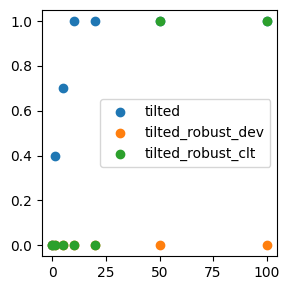

In [91]:
_, ax = plt.subplots(figsize=(3, 3))

method_list = ["tilted", "tilted_robust_dev", "tilted_robust_clt"]
for m in method_list:
    rej_rate = [np.mean(res[std][m]["rej"]) for std in std_ls]
    ax.scatter(std_ls, rej_rate, label=m)

ax.legend()
plt.tight_layout()

In [ ]:
np.random.seed(2024)

eps_ls = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]

n_exp = 500
hvp_denom_sup = 1.
theta = 0.1

res = {eps: {} for eps in eps_ls}
for eps in eps_ls:
    for std in std_ls:
        n_contam = int(n_exp * eps)
        contam_idx = np.random.choice(n_exp, size=(n_contam,))
        
        samples = np.copy(samples_res[0.][:, :n_exp])
        scores = np.copy(scores_res[0.][:, :n_exp])
        hvps = np.copy(hvp_res[0.][:, :n_exp])
        
        noise_samples = np.copy(samples_res[std][:, :n_contam])
        noise_scores = np.copy(scores_res[std][:, :n_contam])
        noise_hvps = np.copy(hvp_res[std][:, :n_contam])
        
        # samples[:, contam_idx] = noise_samples[:, contam_idx]
        # scores[:, contam_idx] = noise_scores[:, contam_idx]
        # hvps[:, contam_idx] = noise_hvps[:, contam_idx]

        samples[:, :n_contam] = noise_samples
        scores[:, :n_contam] = noise_scores
        hvps[:, :n_contam] = noise_hvps
        
        res[eps][std] = exp_utils.run_tests(samples, scores, hvps, hvp_denom_sup=hvp_denom_sup, theta=theta, bw="med", eps0=None, verbose=True)

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                                                                                    | 6/10 [04:43<03:09, 47.29s/it]

In [114]:
# res_500 = res
# pickle.dump(res_500, open("../data/nf/res_500_detailed_params.pkl", "wb"))

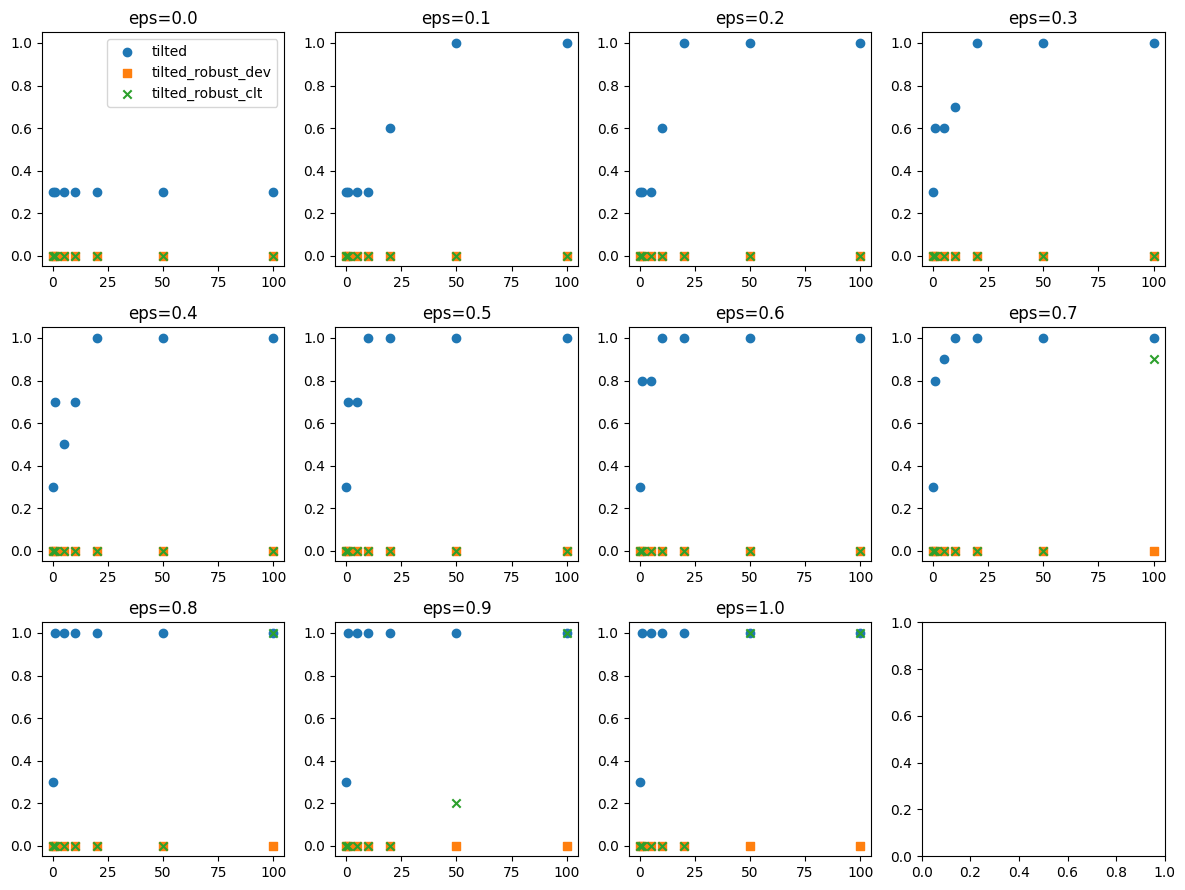

In [117]:
_, axes = plt.subplots(ncols=4, nrows=3, figsize=(3*4, 3*3))

method_list = ["tilted", "tilted_robust_dev", "tilted_robust_clt"]
markers = ["o", "s", "x"]
for i, ax in enumerate(axes.flatten()):
    if i >= len(eps_ls): break
        
    eps = eps_ls[i]
    
    for j, m in enumerate(method_list):
        rej_rate = [np.mean(res[eps][std][m]["rej"]) for std in std_ls]
        ax.scatter(std_ls, rej_rate, label=m, marker=markers[j])
        
    ax.set_ylim(-0.05, 1.05)
    ax.set_title(f"eps={eps}")

axes[0][0].legend()
plt.tight_layout()

#### Load data

In [221]:
res_stats = pickle.load(open("../data/nf/nf_stats_nexp200.pkl", "rb"))

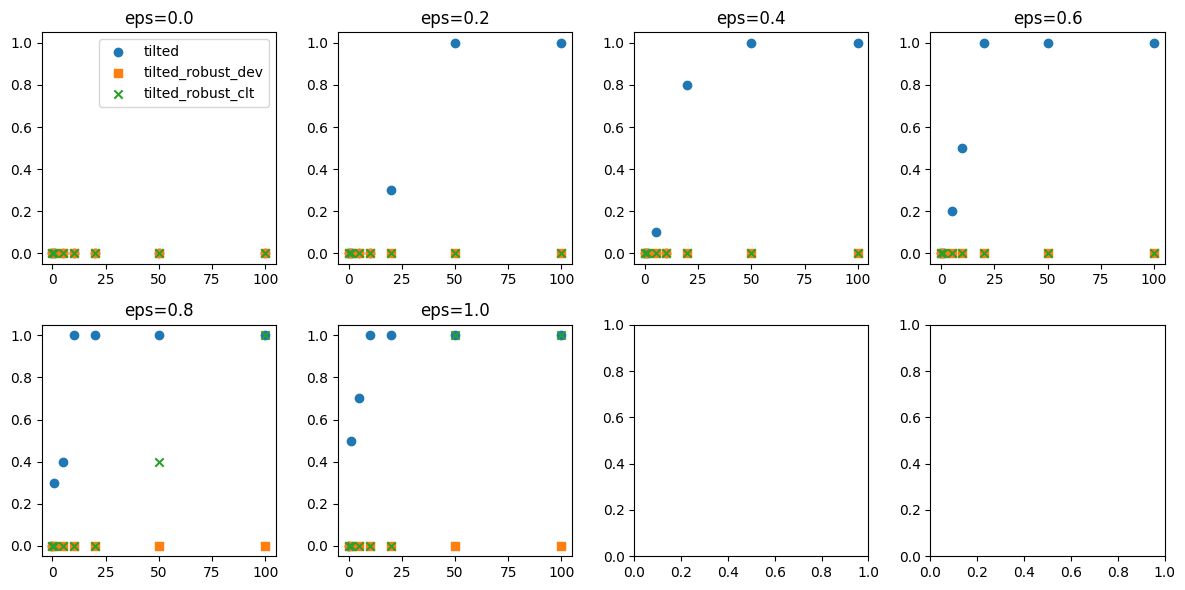

In [225]:
_, axes = plt.subplots(ncols=4, nrows=2, figsize=(3*4, 3*2))

res_plot = res_stats
eps_ls = list(res_plot.keys())
std_ls = list(res_plot[eps_ls[0]].keys())

method_list = ["tilted", "tilted_robust_dev", "tilted_robust_clt"]
markers = ["o", "s", "x"]
for i, ax in enumerate(axes.flatten()):
    if i >= len(eps_ls): break
        
    eps = eps_ls[i]
    
    for j, m in enumerate(method_list):
        rej_rate = [np.mean(res_plot[eps][std][m]["rej"]) for std in std_ls]
        ax.scatter(std_ls, rej_rate, label=m, marker=markers[j])
        
    ax.set_ylim(-0.05, 1.05)
    ax.set_title(f"eps={eps}")

axes[0][0].legend()
plt.tight_layout()
plt.show()

In [159]:
eps = 0.4
std = 50
res_plot[eps][std]["tilted"]["stat"]

[Array(0.00729576, dtype=float32),
 Array(0.00808786, dtype=float32),
 Array(0.00851571, dtype=float32),
 Array(0.00727628, dtype=float32),
 Array(0.00748727, dtype=float32),
 Array(0.00743411, dtype=float32),
 Array(0.00755289, dtype=float32),
 Array(0.00699929, dtype=float32),
 Array(0.0069793, dtype=float32),
 Array(0.00777261, dtype=float32)]

In [242]:
theta_new = 0.075
res_stats_new = copy.deepcopy(res_stats)
for eps in eps_ls:
    for std in std_ls:
        res_stats_new[eps][std] = exp_utils.change_theta(res_stats_new[eps][std], ["tilted_robust_dev", "tilted_robust_clt"], theta_new)

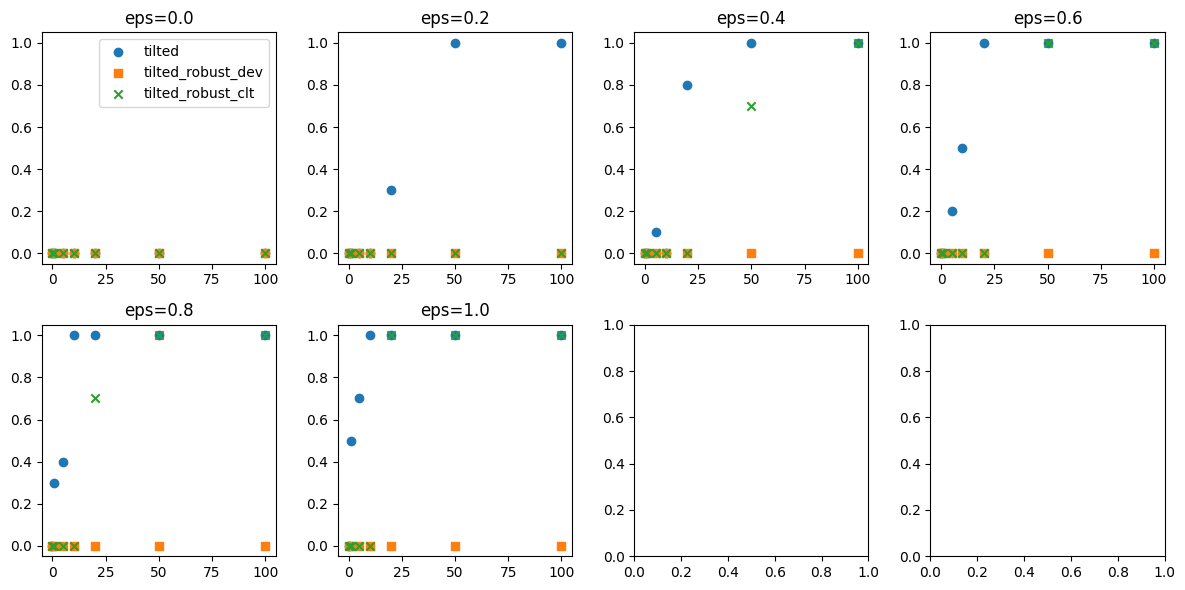

In [243]:
_, axes = plt.subplots(ncols=4, nrows=2, figsize=(3*4, 3*2))

res_plot = res_stats_new
eps_ls = list(res_plot.keys())
std_ls = list(res_plot[eps_ls[0]])

method_list = ["tilted", "tilted_robust_dev", "tilted_robust_clt"]
markers = ["o", "s", "x"]
for i, ax in enumerate(axes.flatten()):
    if i >= len(eps_ls): break
        
    eps = eps_ls[i]
    
    for j, m in enumerate(method_list):
        rej_rate = [np.mean(res_plot[eps][std][m]["rej"]) for std in std_ls]
        ax.scatter(std_ls, rej_rate, label=m, marker=markers[j])
        
    ax.set_ylim(-0.05, 1.05)
    ax.set_title(f"eps={eps}")

axes[0][0].legend()
plt.tight_layout()
plt.show()

#### all-contam samples

In [2]:
res_stats = pickle.load(open("../data/nf/model/nf_stats_power_nexp200.pkl", "rb"))
std_ls = list(res_stats.keys())

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
std_ls

[0.0, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0]

In [4]:
std = std_ls[1]
res_stats[std]["tilted"]["stat"]

[Array(0.00239768, dtype=float32),
 Array(0.00257949, dtype=float32),
 Array(0.00243878, dtype=float32),
 Array(0.00262028, dtype=float32),
 Array(0.00244583, dtype=float32),
 Array(0.00252672, dtype=float32),
 Array(0.00248539, dtype=float32),
 Array(0.00251016, dtype=float32),
 Array(0.00249202, dtype=float32),
 Array(0.0025442, dtype=float32)]

In [19]:
import os

SAVE_DIR = "../data/nf"
n = 500
seed_ls = [0, 9, 18, 27, 36]
std_ls = [0., 1., 5., 10., 20., 50., 100.]

samples_res = {s: [] for s in std_ls}
scores_res = {s: [] for s in std_ls}
hvp_res = {s: [] for s in std_ls}
for s in seed_ls:
    samples_res_sub = pickle.load(open(os.path.join(SAVE_DIR, f"samples_res_n{n}_seed{s}.pkl"), "rb"))
    scores_res_sub = pickle.load(open(os.path.join(SAVE_DIR, f"scores_res_n{n}_seed{s}.pkl"), "rb"))
    hvp_res_sub = pickle.load(open(os.path.join(SAVE_DIR, f"hvp_res_n{n}_seed{s}.pkl"), "rb"))

    for std in std_ls:
        samples_res[std].append(samples_res_sub[std])
        scores_res[std].append(scores_res_sub[std])
        hvp_res[std].append(hvp_res_sub[std])

for std in std_ls:
    samples_res[std] = np.concatenate(samples_res[std], 0)
    scores_res[std] = np.concatenate(scores_res[std], 0)
    hvp_res[std] = np.concatenate(hvp_res[std], 0)


In [79]:
nexp = 200
std = 0.
X = samples_res[std][0, :nexp]
score = scores_res[std][0, :nexp]
hvp = hvp_res[std][0, :nexp]

In [165]:
hvp_denom_sup = 1.
a = 1 # 1e6
c = 1e-3
score_weight_fn = kernels.ScoreWeightFunction(hvp_denom_sup=hvp_denom_sup, a=a, c=c)
kernel0 = kernels.RBF(sigma_sq=None, med_heuristic=True, X=X, Y=X)
kernel = kernels.TiltedKernel(kernel=kernel0, weight_fn=score_weight_fn)

In [166]:
weights = score_weight_fn(X, score)
# weights = np.power(1 + np.sum(score**2, -1) / a, -0.5)
# weights = np.power(1e6 + np.sum(score**2, -1), -0.5)
weighted_score = score * np.expand_dims(weights, -1)

In [167]:
np.sum(weighted_score**2, -1)**0.5

array([835.34362824, 893.45150685, 896.5698767 , 902.68829622,
       869.54159083, 932.92987355, 846.44702238, 897.19867055,
       922.32609355, 886.24844732, 906.40871211, 866.36015038,
       956.9925007 , 904.76078011, 948.63832947, 894.33794286,
       950.21303581, 955.4720484 , 926.15572292, 937.50344046,
       935.21652051, 896.76640161, 938.95649137, 862.4481355 ,
       895.04989014, 941.61148514, 885.48971108, 878.1988433 ,
       891.14430005, 903.65533232, 925.5316729 , 865.91820862,
       914.60888084, 917.00632794, 907.51770784, 892.44210097,
       881.72679275, 943.09407341, 952.879388  , 834.15837834,
       894.45778768, 929.60147986, 925.10574997, 897.77303535,
       930.69830491, 877.99972797, 883.40727264, 970.33358033,
       887.52470136, 943.43566785, 936.30886611, 858.49255782,
       899.21486013, 938.72225501, 901.54136692, 928.60399232,
       881.00123218, 904.87489947, 964.36403661, 852.58996294,
       926.74910405, 916.31522784, 868.97829882, 910.56

In [168]:
K_XX = kernel(X, X, score_X=score, score_Y=score)

In [169]:
K_XX

Array([[0.3022009 , 0.09052633, 0.10034641, ..., 0.09521639, 0.09491823,
        0.08640216],
       [0.09052634, 0.20174439, 0.06057361, ..., 0.07803595, 0.06287095,
        0.06947639],
       [0.10034642, 0.06057362, 0.19616245, ..., 0.07791751, 0.07221986,
        0.0569906 ],
       ...,
       [0.09521639, 0.07803594, 0.07791751, ..., 0.17174642, 0.06846264,
        0.04929595],
       [0.09491823, 0.06287095, 0.07221985, ..., 0.06846265, 0.17657319,
        0.06326495],
       [0.08640216, 0.06947639, 0.0569906 , ..., 0.04929595, 0.06326495,
        0.21415617]], dtype=float32)

In [152]:
weights

Array([0.00054973, 0.00044916, 0.0004429 , 0.0004303 , 0.00049386,
       0.00036006, 0.00053247, 0.00044163, 0.00038641, 0.00046321,
       0.0004224 , 0.00049942, 0.00029011, 0.00042592, 0.00031636,
       0.00044739, 0.0003116 , 0.00029508, 0.00037714, 0.00034798,
       0.00035408, 0.0004425 , 0.00034404, 0.00050615, 0.00044597,
       0.0003367 , 0.00046466, 0.0004783 , 0.00045372, 0.00042826,
       0.00037867, 0.00050019, 0.00040434, 0.00039887, 0.00042001,
       0.00045116, 0.00047176, 0.00033253, 0.00030335, 0.00055152,
       0.00044715, 0.00036857, 0.00037971, 0.00044046, 0.00036579,
       0.00047866, 0.00046861, 0.00024177, 0.00046076, 0.00033156,
       0.00035118, 0.00051283, 0.00043751, 0.00034467, 0.00043269,
       0.00037107, 0.00047311, 0.00042568, 0.00026458, 0.00052258,
       0.00037568, 0.00040046, 0.00049485, 0.00041336, 0.00033829,
       0.00033716, 0.00032758, 0.00040131, 0.00037663, 0.00035923,
       0.00044603, 0.00040956, 0.0003572 , 0.00047506, 0.00051

In [148]:
kernel.base_kernel(X, X)

Array([[1.        , 0.3666286 , 0.4121412 , ..., 0.4179458 , 0.41090304,
        0.3396342 ],
       [0.3666286 , 1.        , 0.30449125, ..., 0.41922784, 0.3331094 ,
        0.33424982],
       [0.4121412 , 0.30449125, 1.        , ..., 0.42450547, 0.38804874,
        0.27805457],
       ...,
       [0.4179458 , 0.41922784, 0.42450547, ..., 1.        , 0.3931402 ,
        0.25704086],
       [0.41090304, 0.3331094 , 0.38804874, ..., 0.3931402 , 1.        ,
        0.3253385 ],
       [0.3396342 , 0.33424982, 0.27805457, ..., 0.25704086, 0.3253385 ,
        1.        ]], dtype=float32)

In [161]:
weighted_score

array([[-14.84576455, -21.42099719,  23.62196665, ..., -13.70876081,
        -17.72688263, -13.01244922],
       [ -9.51903406, -14.16986791, -12.42329079, ..., -13.03279717,
        -14.54034101,  -6.19805978],
       [-11.20198118,  -3.08346232, -11.29459068, ..., -12.13694796,
        -11.57956931, -10.6867337 ],
       ...,
       [ -6.56110517,  -8.6902754 ,  -7.34394775, ...,  -9.1873746 ,
         -5.25504102, -10.70637742],
       [ 10.68552696,  -1.67927354, -10.46880928, ..., -11.74330608,
        -13.37001229,  89.95994053],
       [-11.86591818,  40.47977826,  -8.89217762, ...,  -3.06819928,
        -12.57390466,  -9.46832236]])

In [149]:
term1_mat = np.matmul(score, np.moveaxis(score, (-1, -2), (-2, -1))) * K_XX

In [150]:
term1_mat

Array([[ 6.9779903e-01,  2.3992207e-02,  1.3555957e-03, ...,
        -8.5085686e-03, -6.9019981e-03,  4.6666249e-04],
       [ 2.3992209e-02,  7.9825568e-01, -6.0480647e-03, ...,
        -7.9762731e-03, -9.2267292e-03, -1.2213973e-02],
       [ 1.3555957e-03, -6.0480651e-03,  8.0383754e-01, ...,
        -1.0477828e-02,  5.2113966e-03,  3.0501375e-02],
       ...,
       [-8.5085686e-03, -7.9762731e-03, -1.0477829e-02, ...,
         8.2825369e-01, -1.0780095e-02, -2.8280600e-03],
       [-6.9019976e-03, -9.2267301e-03,  5.2113966e-03, ...,
        -1.0780095e-02,  8.2342684e-01, -4.2669512e-03],
       [ 4.6666255e-04, -1.2213973e-02,  3.0501375e-02, ...,
        -2.8280600e-03, -4.2669512e-03,  7.8584385e-01]], dtype=float32)

In [185]:
theta = .1
hvp_denom_sup = 1
# weight_fn_args = {"a": 1e6}
weight_fn_args = {"c": 1e-3}

std_ls = [0., 1., 5., 10., 20., 50., 100.]

res = {}
for std in std_ls:
    print("std:", std)
    samples = np.copy(samples_res[std][:, :nexp])
    scores = np.copy(scores_res[std][:, :nexp])
    hvps = np.copy(hvp_res[std][:, :nexp])

    res[std] = exp_utils.run_tests(
        samples, scores, hvps, hvp_denom_sup=hvp_denom_sup, theta=theta, bw="med", eps0=None, verbose=True, weight_fn_args=weight_fn_args,
    )

std: 0.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.54s/it]


std: 1.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.59s/it]


std: 5.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.44s/it]


std: 10.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.47s/it]


std: 20.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.54s/it]


std: 50.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:04<00:00,  6.49s/it]


std: 100.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.57s/it]


In [196]:
std = 0.
res[std]["tilted"]["nonsq_stat"]

[Array(67.10788, dtype=float32),
 Array(67.31988, dtype=float32),
 Array(67.646416, dtype=float32),
 Array(67.27941, dtype=float32),
 Array(67.639084, dtype=float32),
 Array(67.70192, dtype=float32),
 Array(67.60847, dtype=float32),
 Array(66.47211, dtype=float32),
 Array(67.69146, dtype=float32),
 Array(66.592384, dtype=float32)]

In [100]:
res_stats[std]["tilted"]["nonsq_stat"]

[Array(0.01607543, dtype=float32),
 Array(0.01655573, dtype=float32),
 Array(0.01901679, dtype=float32),
 Array(0.01709447, dtype=float32),
 Array(0.01706602, dtype=float32),
 Array(0.01806276, dtype=float32),
 Array(0.01690758, dtype=float32),
 Array(0.01452494, dtype=float32),
 Array(0.01476515, dtype=float32),
 Array(0.01949293, dtype=float32)]

<Figure size 640x480 with 0 Axes>

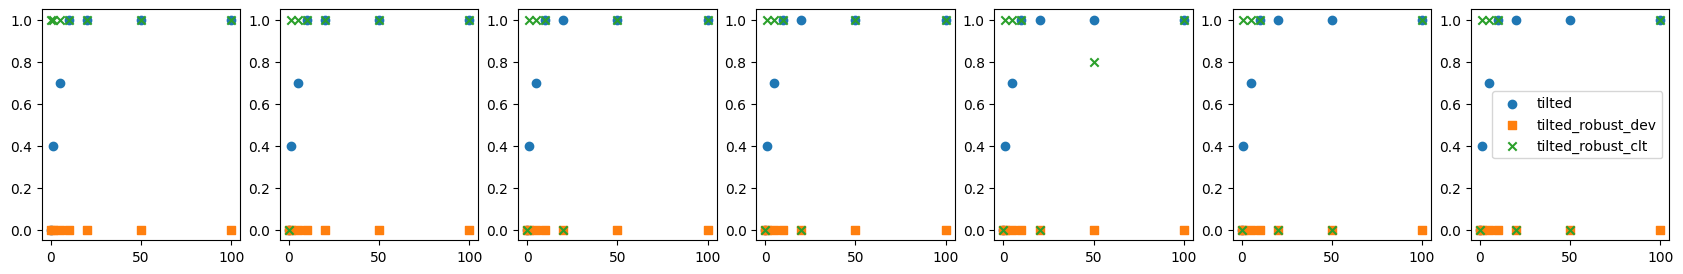

In [189]:
# theta_new_ls = [0.01, 0.04, 0.08, 0.1]
theta_new_ls = [60., 70., 80., 90., 100., 120., 200.]

_, axes = plt.subplots(ncols=len(theta_new_ls), figsize=(3*len(theta_new_ls), 3))

for theta_new, ax in zip(theta_new_ls, axes):
    res_new = copy.deepcopy(res)
    for std in [0., 20., 50.]:
        res_new[std] = exp_utils.change_theta(res_new[std], ["tilted_robust_dev", "tilted_robust_clt"], theta_new)
    
    res_plot = res_new
    std_ls = list(res_plot.keys())
    
    method_list = ["tilted", "tilted_robust_dev", "tilted_robust_clt"]
    markers = ["o", "s", "x"]
    
    for j, m in enumerate(method_list):
        rej_rate = [np.mean(res_plot[std][m]["rej"]) for std in std_ls]
        ax.scatter(std_ls, rej_rate, label=m, marker=markers[j])
    
    ax.set_ylim(-0.05, 1.05)

ax.legend()
plt.show()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

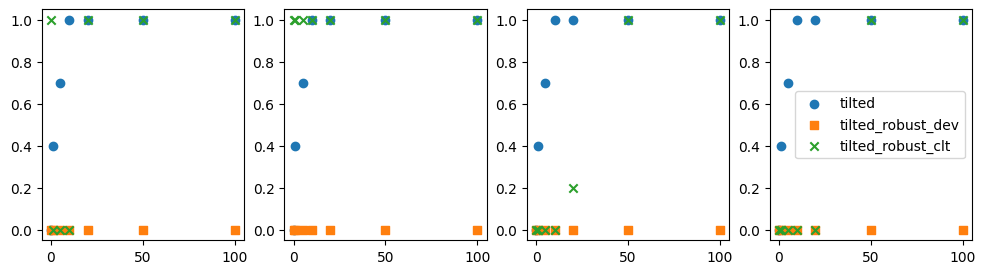

In [118]:
theta_new_ls = [0.01, 0.04, 0.08, 0.1]

_, axes = plt.subplots(ncols=len(theta_new_ls), figsize=(3*len(theta_new_ls), 3))

for theta_new, ax in zip(theta_new_ls, axes):
    res_new = copy.deepcopy(res_stats)
    for std in std_ls:
        res_new[std] = exp_utils.change_theta(res_new[std], ["tilted_robust_dev", "tilted_robust_clt"], theta_new)
    
    res_plot = res_new
    std_ls = list(res_plot.keys())
    
    method_list = ["tilted", "tilted_robust_dev", "tilted_robust_clt"]
    markers = ["o", "s", "x"]
    
    for j, m in enumerate(method_list):
        rej_rate = [np.mean(res_plot[std][m]["rej"]) for std in std_ls]
        ax.scatter(std_ls, rej_rate, label=m, marker=markers[j])
    
    ax.set_ylim(-0.05, 1.05)

ax.legend()
plt.show()
plt.tight_layout()

## Full-noise mixture

In [5]:
res_stats = pickle.load(open("../data/nf/model_full/nf_stats_model_full_nexp500.pkl", "rb"))

In [6]:
eps_ls = list(res_stats.keys())
std_ls = list(res_stats[eps_ls[0]].keys())
print("std_ls", std_ls)

std_ls [0.0, 10.0, 50.0, 100.0]


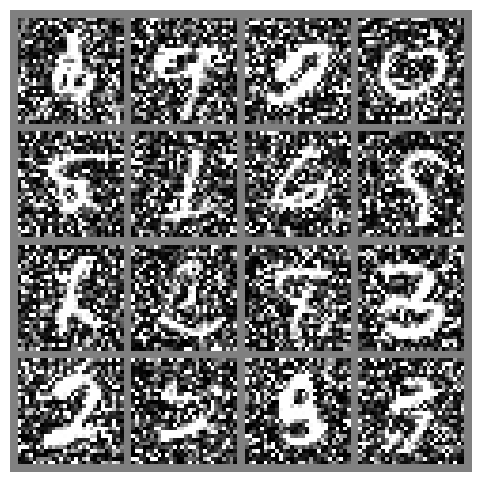

In [8]:
import torch


std = std_ls[1]

samples_res = pickle.load(open("../data/nf/model_full/samples_res_n500_seed0.pkl", "rb"))
nf_utils.show_imgs(torch.tensor(samples_res[std][0, :16].reshape([-1, 1, 28, 28]), dtype=torch.int32))

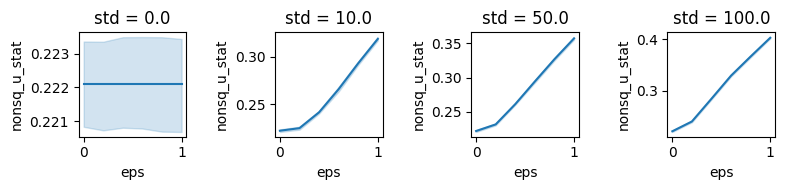

In [9]:
_, axes = plt.subplots(ncols=len(std_ls), figsize=(2*len(std_ls), 2))

res_plot = res_stats

mean_nonsq_stat_ls = []
for ax, std in zip(axes.flatten(), std_ls):
    plot_df = {"eps": [], "nonsq_stat": [], "std": [], "nonsq_u_stat": []}
    
    for eps in eps_ls:
        rr = res_plot[eps][std]["tilted"]["nonsq_stat"]
        plot_df["nonsq_stat"] = plot_df["nonsq_stat"] + np.array(rr).tolist()
        plot_df["nonsq_u_stat"] = plot_df["nonsq_u_stat"] + (np.array(rr)**0.5).tolist()
        plot_df["eps"] = plot_df["eps"] + [eps] * len(rr)
        plot_df["std"] = plot_df["std"] + [float(std)] * len(rr)
    plot_df = pd.DataFrame(plot_df)

    # ax.scatter(eps_ls, mean_nonsq_stat_ls)
    sns.lineplot(ax=ax, data=plot_df, x="eps", y="nonsq_u_stat")
    ax.set_title(f"std = {std}")

plt.tight_layout()

theta_new 0.002


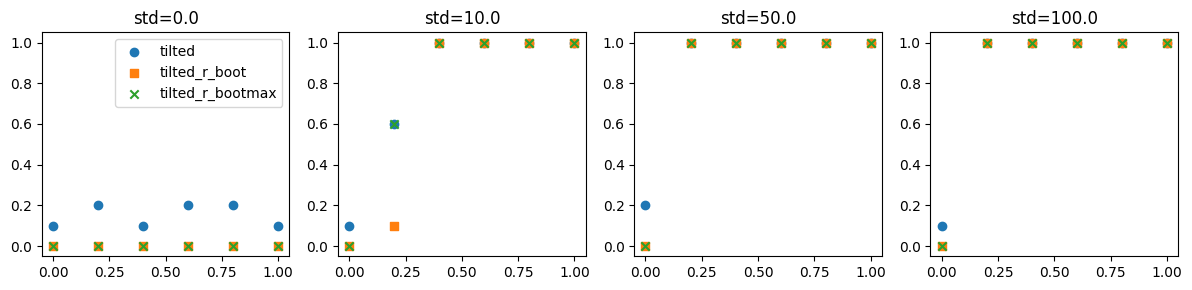

In [12]:
_, axes = plt.subplots(ncols=4, figsize=(3*4, 3))

theta_new = 0.002
print("theta_new", theta_new)
# change theta
res_new = copy.deepcopy(res_stats)
for eps in eps_ls:
    for std in std_ls:
        res_new[eps][std] = exp_utils.change_theta(
            res_new[eps][std], ["tilted_r_boot", "tilted_r_bootmax"], theta_new)    

# plot
res_plot = res_new

method_list = ["tilted", "tilted_r_boot", "tilted_r_bootmax"]
markers = ["o", "s", "x", "^"]
for i, ax in enumerate(axes.flatten()):
    if i >= len(std_ls): break
        
    std = std_ls[i]
    
    for j, m in enumerate(method_list):
        rej_rate = [np.mean(res_plot[eps][std][m]["rej"]) for eps in eps_ls]
        ax.scatter(eps_ls, rej_rate, label=m, marker=markers[j])
        
    ax.set_ylim(-0.05, 1.05)
    ax.set_title(f"std={std}")

axes[0].legend()
plt.tight_layout()

theta_new 0.002


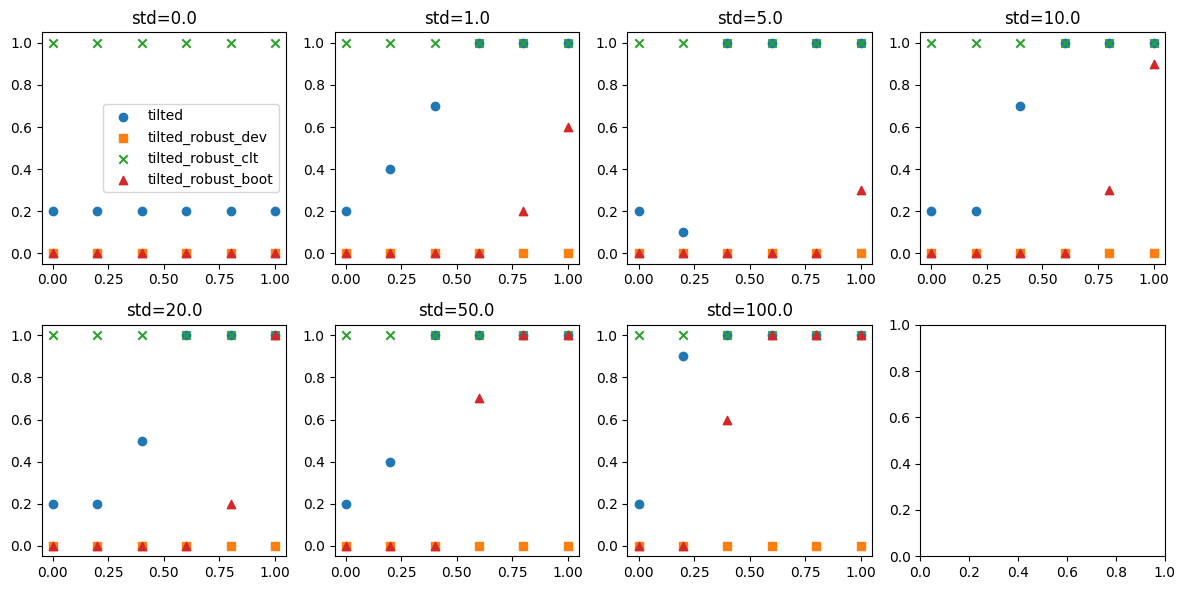

In [136]:
_, axes = plt.subplots(ncols=4, nrows=2, figsize=(3*4, 3*2))

theta_new = 0.002
print("theta_new", theta_new)
# change theta
res_new = copy.deepcopy(res_stats)
for eps in eps_ls:
    for std in std_ls:
        res_new[eps][std] = exp_utils.change_theta(res_new[eps][std], 
                                                   ["tilted_robust_dev", "tilted_robust_clt", "tilted_robust_boot"], theta_new)    

# plot
res_plot = res_new

method_list = ["tilted", "tilted_robust_dev", "tilted_robust_clt", "tilted_robust_boot"]
markers = ["o", "s", "x", "^"]
for i, ax in enumerate(axes.flatten()):
    if i >= len(std_ls): break
        
    std = std_ls[i]
    
    for j, m in enumerate(method_list):
        rej_rate = [np.mean(res_plot[eps][std][m]["rej"]) for eps in eps_ls]
        ax.scatter(eps_ls, rej_rate, label=m, marker=markers[j])
        
    ax.set_ylim(-0.05, 1.05)
    ax.set_title(f"std={std}")

axes[0][0].legend()
plt.tight_layout()

## MNIST samples

In [109]:
n_ls = [100, 200, 300, 400]
res_stats = {}
for n in n_ls:
    res_stats[n] = pickle.load(open(f"../data/nf/mnist/nf_stats_mnist_nexp{n}.pkl", "rb"))

/tmp/ipykernel_2765684/1930814822.py:9: RuntimeWarning: invalid value encountered in sqrt
  plot_df["nonsq_u_stat"] = plot_df["nonsq_u_stat"] + (np.array(res_plot[n]["tilted"]["u_stat"])**0.5).tolist()


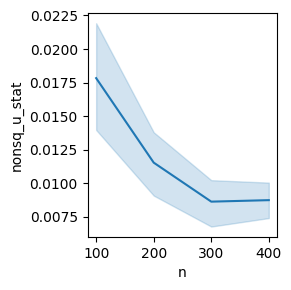

In [130]:
_, ax = plt.subplots(figsize=(3, 3))

res_plot = res_stats

plot_df = {"nonsq_stat": [], "n": [], "nonsq_u_stat": []}
for n in n_ls:
    rr = res_plot[n]["tilted"]["nonsq_stat"]
    plot_df["nonsq_stat"] = plot_df["nonsq_stat"] + np.array(rr).tolist()
    plot_df["nonsq_u_stat"] = plot_df["nonsq_u_stat"] + (np.array(res_plot[n]["tilted"]["u_stat"])**0.5).tolist()
    plot_df["n"] = plot_df["n"] + [n] * len(rr)
plot_df = pd.DataFrame(plot_df)

sns.lineplot(ax=ax, data=plot_df, x="n", y="nonsq_u_stat")

plt.tight_layout()

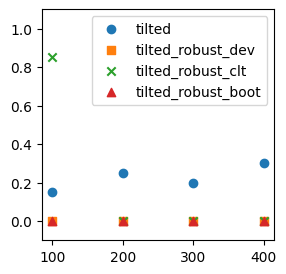

In [110]:
_, ax = plt.subplots(figsize=(3, 3))

method_list = ["tilted", "tilted_robust_dev", "tilted_robust_clt", "tilted_robust_boot"]
markers = ["o", "s", "x", "^"]

for i, m in enumerate(method_list):
    rej_ls = []
    
    for n in n_ls:
        rej_ls.append(np.mean(res_stats[n][m]["rej"]))

    ax.scatter(n_ls, rej_ls, label=m, marker=markers[i])

ax.set_ylim(-0.1, 1.1)
ax.legend()
plt.show()

theta_new 0.02


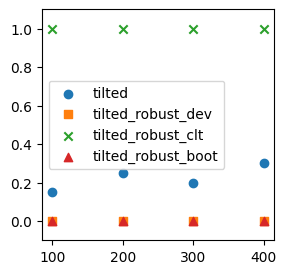

In [121]:
theta_new = 0.02
print("theta_new", theta_new)

# change theta
res_new = copy.deepcopy(res_stats)
for n in n_ls:
    res_new[n] = exp_utils.change_theta(res_new[n], ["tilted_robust_dev", "tilted_robust_clt", "tilted_robust_boot"], theta_new)    
    

_, ax = plt.subplots(figsize=(3, 3))
for i, m in enumerate(method_list):
    rej_ls = []
    
    for n in n_ls:
        rej_ls.append(np.mean(res_new[n][m]["rej"]))

    ax.scatter(n_ls, rej_ls, label=m, marker=markers[i])

ax.set_ylim(-0.1, 1.1)
ax.legend()
plt.show()

# Convoluted densities

In [208]:
import scipy.stats as sci_stats

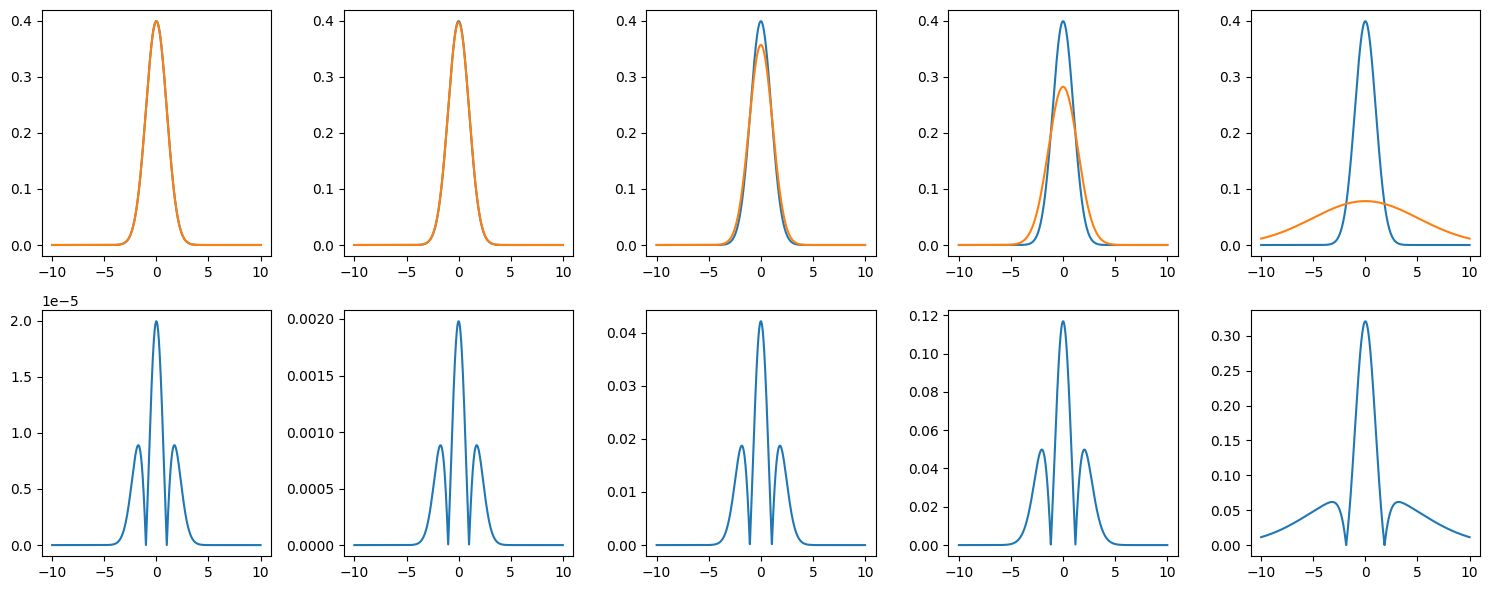

In [215]:
noise_std_ls = [0.01, 0.1, 0.5, 1., 5.]

_, axes = plt.subplots(ncols=len(noise_std_ls), nrows=2, figsize=(3*len(noise_std_ls), 3*2))

xx = np.linspace(-10., 10., 1001)
pp = sci_stats.norm.pdf(xx)

for i, ss in enumerate(noise_std_ls):
    qq = sci_stats.norm.pdf(xx, scale=np.sqrt(1 + ss**2))

    ax = axes[0][i]
    ax.plot(xx, pp)
    ax.plot(xx, qq)

    ax = axes[1][i]
    ax.plot(xx, np.abs(pp - qq))

plt.tight_layout()
plt.show()

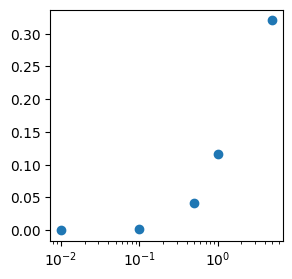

In [220]:
xx = np.linspace(-10., 10., 1001)
pp = sci_stats.norm.pdf(xx)

diff_ls = []
for i, ss in enumerate(noise_std_ls):
    qq = sci_stats.norm.pdf(xx, scale=np.sqrt(1 + ss**2))
    diff_ls.append(np.max(np.abs(pp - qq)))

_, ax = plt.subplots(figsize=(3, 3))
plt.scatter(noise_std_ls, diff_ls)
plt.xscale("log")
plt.show()